# 3. Exprolatory Data Analysis (EDA)
<목적>

Machine learning model로 분석하기 전, target variable에 관계성이 있는 variable을 선정해서 향후 model prediction을 향상시키기 위함

<정리>
* Categorical variable: 시각화: boxplot --> 분석: ANOVA
* Numeric variable : 시각화: scatterplot & fitted line  -->  분석: Pearson correlation

In [1]:
import pandas as pd
import numpy as np
car = pd.read_csv('https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DA0101EN-SkillsNetwork/labs/Data%20files/automobileEDA.csv')
car.head()

,symboling,normalized-losses,make,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,...,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price,city-L/100km,horsepower-binned,diesel,gas
0,3,122,alfa-romero,std,two,convertible,rwd,front,88.6,0.811148,...,9.0,111.0,5000.0,21,27,13495.0,11.190476,Medium,0,1
1,3,122,alfa-romero,std,two,convertible,rwd,front,88.6,0.811148,...,9.0,111.0,5000.0,21,27,16500.0,11.190476,Medium,0,1
2,1,122,alfa-romero,std,two,hatchback,rwd,front,94.5,0.822681,...,9.0,154.0,5000.0,19,26,16500.0,12.368421,Medium,0,1
3,2,164,audi,std,four,sedan,fwd,front,99.8,0.848630,...,10.0,102.0,5500.0,24,30,13950.0,9.791667,Medium,0,1
4,2,164,audi,std,four,sedan,4wd,front,99.4,0.848630,...,8.0,115.0,5500.0,18,22,17450.0,13.055556,Medium,0,1


## Analyze Individual Feature using Visualization

In [12]:
# seaborn 설치하기
%%capture             # 왜 작동 오류나지????????????????
! pip install seaborn

UsageError: Line magic function `%%capture` not found.


In [16]:
import matplotlib.pyplot as plt
import seaborn as sns
# Jupiter NB에 plotting하기 위해서 필요함
%matplotlib inline    

In [17]:
# correlation efficient 구하기
car.corr()  # int와 float 컬럼에 대해서만 구해짐

,symboling,normalized-losses,wheel-base,length,width,height,curb-weight,engine-size,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price,city-L/100km,diesel,gas
symboling,1.000000,0.466264,-0.535987,-0.365404,-0.242423,-0.550160,-0.233118,-0.110581,-0.140019,-0.008245,-0.182196,0.075819,0.279740,-0.035527,0.036233,-0.082391,0.066171,-0.196735,0.196735
normalized-losses,0.466264,1.000000,-0.056661,0.019424,0.086802,-0.373737,0.099404,0.112360,-0.029862,0.055563,-0.114713,0.217299,0.239543,-0.225016,-0.181877,0.133999,0.238567,-0.101546,0.101546
wheel-base,-0.535987,-0.056661,1.000000,0.876024,0.814507,0.590742,0.782097,0.572027,0.493244,0.158502,0.250313,0.371147,-0.360305,-0.470606,-0.543304,0.584642,0.476153,0.307237,-0.307237
length,-0.365404,0.019424,0.876024,1.000000,0.857170,0.492063,0.880665,0.685025,0.608971,0.124139,0.159733,0.579821,-0.285970,-0.665192,-0.698142,0.690628,0.657373,0.211187,-0.211187
width,-0.242423,0.086802,0.814507,0.857170,1.000000,0.306002,0.866201,0.729436,0.544885,0.188829,0.189867,0.615077,-0.245800,-0.633531,-0.680635,0.751265,0.673363,0.244356,-0.244356
height,-0.550160,-0.373737,0.590742,0.492063,0.306002,1.000000,0.307581,0.074694,0.180449,-0.062704,0.259737,-0.087027,-0.309974,-0.049800,-0.104812,0.135486,0.003811,0.281578,-0.281578
curb-weight,-0.233118,0.099404,0.782097,0.880665,0.866201,0.307581,1.000000,0.849072,0.644060,0.167562,0.156433,0.757976,-0.279361,-0.749543,-0.794889,0.834415,0.785353,0.221046,-0.221046
engine-size,-0.110581,0.112360,0.572027,0.685025,0.729436,0.074694,0.849072,1.000000,0.572609,0.209523,0.028889,0.822676,-0.256733,-0.650546,-0.679571,0.872335,0.745059,0.070779,-0.070779
bore,-0.140019,-0.029862,0.493244,0.608971,0.544885,0.180449,0.644060,0.572609,1.000000,-0.055390,0.001263,0.566936,-0.267392,-0.582027,-0.591309,0.543155,0.554610,0.054458,-0.054458
stroke,-0.008245,0.055563,0.158502,0.124139,0.188829,-0.062704,0.167562,0.209523,-0.055390,1.000000,0.187923,0.098462,-0.065713,-0.034696,-0.035201,0.082310,0.037300,0.241303,-0.241303


In [18]:
# 특정 컬럼에 대해서만 관계성 확인
car[['bore', 'stroke', 'compression-ratio', 'price']].corr()

,bore,stroke,compression-ratio,price
bore,1.000000,-0.055390,0.001263,0.543155
stroke,-0.055390,1.000000,0.187923,0.082310
compression-ratio,0.001263,0.187923,1.000000,0.071107
price,0.543155,0.082310,0.071107,1.000000


## Categorical Variables
data type: object, category, int64

시각화 : boxplot

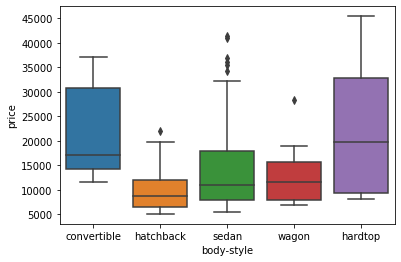

In [19]:
# body-style과 price 관계성
sns.boxplot('body-style', 'price', data=car)

Text(0, 0.5, 'price of car')

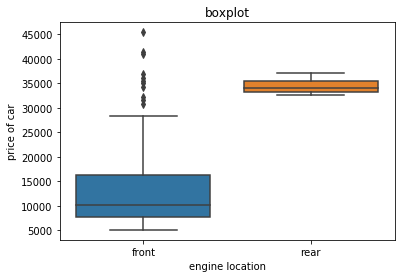

In [20]:
# engine-location과 price 관계성
sns.boxplot('engine-location', 'price', data=car)
import matplotlib.pyplot as plt     # 제목, label 넣고 싶을 때
# %matplotlib inline
plt.title('boxplot')
plt.xlabel('engine location')
plt.ylabel('price of car')

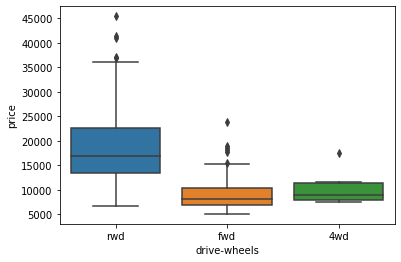

In [21]:
# drive-wheels과 price의 관계
sns.boxplot(x='drive-wheels', y='price', data=car)

## Continuous Numerical Variables
int or float 타입

시각화 방법: scatterplot & fitted lines  -->  regplot

(0, 53465.48165644695)

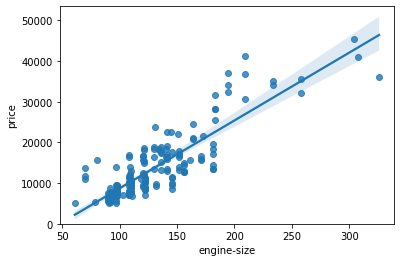

In [22]:
# Engine-size와 price 관계성
sns.regplot(x='engine-size', y='price', data=car)    # scatterplot & regression line
plt.ylim(0,)     # y축 범위 지정

In [23]:
# Engine-size와 price의 correlation efficient 값과 비교
car[['engine-size', 'price']].corr()

,engine-size,price
engine-size,1.000000,0.872335
price,0.872335,1.000000


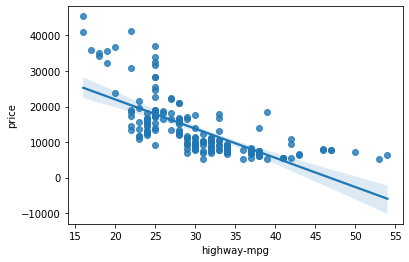

In [24]:
# Highway-mpg와 price의 관계성
sns.regplot(car['highway-mpg'], car['price'], data=car)

In [25]:
# coefficient
car[['highway-mpg', 'price']].corr()

,highway-mpg,price
highway-mpg,1.000000,-0.704692
price,-0.704692,1.000000


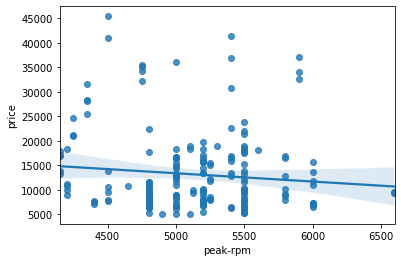

In [26]:
# Peak-rpm과 price의 관계성
sns.regplot('peak-rpm', 'price', data=car)

In [27]:
# coefficient
car[['peak-rpm', 'price']].corr()

,peak-rpm,price
peak-rpm,1.000000,-0.101616
price,-0.101616,1.000000


## Descriptive Statistics
describe() : NaN과 object type은 자동으로 거르고 산출함

In [28]:
car.describe()

,symboling,normalized-losses,wheel-base,length,width,height,curb-weight,engine-size,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price,city-L/100km,diesel,gas
count,201.000000,201.00000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,197.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000
mean,0.840796,122.00000,98.797015,0.837102,0.915126,53.766667,2555.666667,126.875622,3.330692,3.256904,10.164279,103.405534,5117.665368,25.179104,30.686567,13207.129353,9.944145,0.099502,0.900498
std,1.254802,31.99625,6.066366,0.059213,0.029187,2.447822,517.296727,41.546834,0.268072,0.319256,4.004965,37.365700,478.113805,6.423220,6.815150,7947.066342,2.534599,0.300083,0.300083
min,-2.000000,65.00000,86.600000,0.678039,0.837500,47.800000,1488.000000,61.000000,2.540000,2.070000,7.000000,48.000000,4150.000000,13.000000,16.000000,5118.000000,4.795918,0.000000,0.000000
25%,0.000000,101.00000,94.500000,0.801538,0.890278,52.000000,2169.000000,98.000000,3.150000,3.110000,8.600000,70.000000,4800.000000,19.000000,25.000000,7775.000000,7.833333,0.000000,1.000000
50%,1.000000,122.00000,97.000000,0.832292,0.909722,54.100000,2414.000000,120.000000,3.310000,3.290000,9.000000,95.000000,5125.369458,24.000000,30.000000,10295.000000,9.791667,0.000000,1.000000
75%,2.000000,137.00000,102.400000,0.881788,0.925000,55.500000,2926.000000,141.000000,3.580000,3.410000,9.400000,116.000000,5500.000000,30.000000,34.000000,16500.000000,12.368421,0.000000,1.000000
max,3.000000,256.00000,120.900000,1.000000,1.000000,59.800000,4066.000000,326.000000,3.940000,4.170000,23.000000,262.000000,6600.000000,49.000000,54.000000,45400.000000,18.076923,1.000000,1.000000


In [29]:
# obeject type도 포함시키기
car.describe(include='all')
# 또는 object 통계만 보려면
car.describe(include=['object'])

,make,aspiration,num-of-doors,body-style,drive-wheels,engine-location,engine-type,num-of-cylinders,fuel-system,horsepower-binned
count,201,201,201,201,201,201,201,201,201,200
unique,22,2,2,5,3,2,6,7,8,3
top,toyota,std,four,sedan,fwd,front,ohc,four,mpfi,Low
freq,32,165,115,94,118,198,145,157,92,115


## Value Counts
Pandas series(컬럼 한줄)에만 작용함. Dataframe에 적용 안됨  -->  [] bracket 하나 사용!! <br>
==> 2021.07 기준 series, dataframe 모두 사용 가능함!

In [30]:
type(car['drive-wheels'])     # pandas series, 줄로 보임
type(car[['drive-wheels']])   # pandas dataframe, 표로 보임

pandas.core.frame.DataFrame

In [31]:
counts = car['drive-wheels'].value_counts()               # series에 적용
counts = car['drive-wheels'].value_counts().to_frame()    # dataframe으로 바꿈
counts.rename(columns={'drive-wheels':'value-counts'}, inplace=True)
counts.index.name = 'drive-wheels'    # column 이름이 아니라, index 위에 이름 붙여줌 
counts

,value-counts
drive-wheels,
fwd,118
rwd,75
4wd,8


In [32]:
# Engine-location에도 해보기
e_counts = car['engine-location'].value_counts().to_frame()
e_counts.rename(columns={'engine-location':'value_counts'}, inplace=True)
e_counts.index.name = 'engine-location'
e_counts      # 한쪽 카테고리에 값이 몰려있어서 good predictor 아님

,value_counts
engine-location,
front,198
rear,3


## GroupBy in Python
**pivot table** : 변수가 컬럼뿐만 아니라 index에도 들어간 2차원 테이블  -->  Excel spreadsheet과 pivot table과 유사  -->  pivot()

**Heatmap** : pivot table을 시각화하기에 적당함

In [33]:
# decribe()에서의 unique값 불러오기
car['drive-wheels'].unique()

array(['rwd', 'fwd', '4wd'], dtype=object)

In [34]:
# drive-wheels, body-style, price를 비교하기
group = car[['drive-wheels', 'price', 'body-style']]
group

,drive-wheels,price,body-style
0,rwd,13495.0,convertible
1,rwd,16500.0,convertible
2,rwd,16500.0,hatchback
3,fwd,13950.0,sedan
4,4wd,17450.0,sedan
...,...,...,...
196,rwd,16845.0,sedan
197,rwd,19045.0,sedan
198,rwd,21485.0,sedan
199,rwd,22470.0,sedan


In [35]:
# Grouping 하기
group1 = group.groupby(['drive-wheels'], as_index=False).mean()
group1     # body-style은 numeric variable이 아니라 평균을 못구해서 알아서 price만 나온것

,drive-wheels,price
0,4wd,10241.000000
1,fwd,9244.779661
2,rwd,19757.613333


In [40]:
group2 = group.groupby(['drive-wheels', 'body-style'], as_index=False).mean()
group2.head()

,drive-wheels,body-style,price
0,4wd,hatchback,7603.000000
1,4wd,sedan,12647.333333
2,4wd,wagon,9095.750000
3,fwd,convertible,11595.000000
4,fwd,hardtop,8249.000000


Pivot 함수 인수 index, columns는 기존 dataframe의 컬럼으로부터 가져오는 것이라서, groupby할 때 `as_index=False` 설정을 해야 한다.

In [37]:
pivot = group2.pivot(index='drive-wheels', columns='body-style')
pivot

price                                            \
body-style   convertible       hardtop     hatchback         sedan   
drive-wheels                                                         
4wd                  NaN           NaN   7603.000000  12647.333333   
fwd              11595.0   8249.000000   8396.387755   9811.800000   
rwd              23949.6  24202.714286  14337.777778  21711.833333   

                            
body-style           wagon  
drive-wheels                
4wd            9095.750000  
fwd            9997.333333  
rwd           16994.222222

In [74]:
# NaN값을 0으로 채우기
group3 = pivot.fillna(0)
group3

price                                            \
body-style   convertible       hardtop     hatchback         sedan   
drive-wheels                                                         
4wd                  0.0      0.000000   7603.000000  12647.333333   
fwd              11595.0   8249.000000   8396.387755   9811.800000   
rwd              23949.6  24202.714286  14337.777778  21711.833333   

                            
body-style           wagon  
drive-wheels                
4wd            9095.750000  
fwd            9997.333333  
rwd           16994.222222

In [2]:
# 3개 이상의 표인 경우 궁금해서 해봄
a = car[['drive-wheels', 'num-of-doors', 'body-style', 'horsepower', 'price']]
b = a.groupby(['drive-wheels', 'num-of-doors', 'body-style'], as_index=False).mean()
b

,drive-wheels,num-of-doors,body-style,horsepower,price
0,4wd,four,sedan,102.666667,12647.333333
1,4wd,four,wagon,79.250000,9095.750000
2,4wd,two,hatchback,73.000000,7603.000000
3,fwd,four,hatchback,75.900000,8372.000000
4,fwd,four,sedan,89.127660,10037.404255
5,fwd,four,wagon,90.188013,9997.333333
6,fwd,two,convertible,90.000000,11595.000000
7,fwd,two,hardtop,69.000000,8249.000000
8,fwd,two,hatchback,87.570671,8402.641026
9,fwd,two,sedan,76.125000,8486.375000


In [4]:
c = b.pivot(index=['drive-wheels', 'num-of-doors'], columns='body-style')  
c

horsepower                                      \
body-style                convertible     hardtop   hatchback       sedan   
drive-wheels num-of-doors                                                   
4wd          four                 NaN         NaN         NaN  102.666667   
             two                  NaN         NaN   73.000000         NaN   
fwd          four                 NaN         NaN   75.900000   89.127660   
             two                 90.0   69.000000   87.570671   76.125000   
rwd          four                 NaN         NaN         NaN  126.800000   
             two                140.0  152.714286  133.388889  141.333333   

                                            price                              \
body-style                      wagon convertible       hardtop     hatchback   
drive-wheels num-of-doors                                                       
4wd          four           79.250000         NaN           NaN           NaN   
             two                  NaN         NaN           NaN   7603.000000   
fwd          four           90.188013         NaN           NaN   8372.000000   
             two                  NaN     11595.0   8249.000000   8402.641026   
rwd          four          116.777778         NaN           NaN           NaN   
             two                  NaN     23949.6  24202.714286  14337.777778   

                                                       
body-style                        sedan         wagon  
drive-wheels num-of-doors                              
4wd          four          12647.333333   9095.750000  
             two                    NaN           NaN  
fwd          four          10037.404255   9997.333333  
             two            8486.375000           NaN  
rwd          four          21651.833333  16994.222222  
             two           22011.833333           NaN

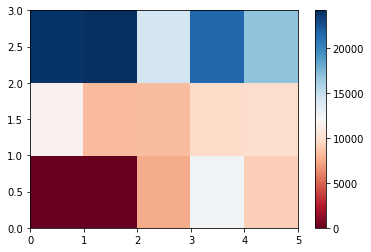

In [46]:
# heatmap으로 시각화
import matplotlib.pyplot as plt
%matplotlib inline

plt.pcolor(group3, cmap='RdBu')     # pseudocolor plot 생성
plt.colorbar()                      # bar 생성
plt.show()                          # 윗줄 지우고 display용으로 전환

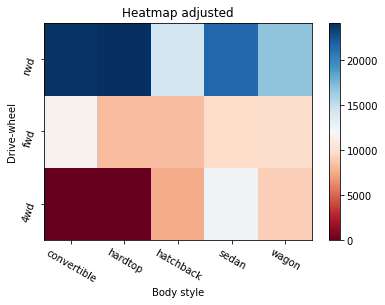

In [47]:
# label 바꾸기
fig, ax = plt.subplots()              # 틀 만들기
im = ax.pcolor(group3, cmap='RdBu')   # 위 이미지 넣기

# Label할 이름 가져오기
row_labels = group3.columns.levels[1]  # levels[0]: price값을 가져옴
row_labels
col_labels = group3.index
col_labels

# tick(눈금)과 lable을 중앙으로 옮기기
# np.arange는 주어진 구간에서 일정하게 나눠진 값을 찾는 것
# integer에서는 np.arange, float에서는 np.linspace 추천
ax.set_xticks(np.arange(group3.shape[1])+0.5, minor=False)
ax.set_yticks(np.arange(group3.shape[0])+0.5, minor=False)

# label 이름을 집어넣기
ax.set_xticklabels(row_labels, minor=False)
ax.set_yticklabels(col_labels, minor=False)

# label이 긴 경우 세로로 회전시킴
plt.xticks(rotation=-30)
plt.yticks(rotation=72)

# 축이름 집어넣기
plt.xlabel('Body style')
plt.ylabel('Drive-wheel')
plt.title('Heatmap adjusted')

# color 넣기
fig.colorbar(im)
plt.show()                  

## ANalysis Of VAriance (ANOVA)
하나의 independent variable안의 group간에 dependent variable 값 평균의 차이가 큰지 확인하는 통계법

그룹간의 차이를 분석하기 때문에 groupby()이 편리함 
* <b>F-test score</b> : 모든 그룹의 평균이 같다고 가정하고, 실제 평균이 이 가정으로부터 얼마나 벗어났는지를 측정 
  
  --> 공식: (variance of group means) / (variance in sample group)
    
    ==> <b>F가 크면, variable category와 target variable간의 correlation이 크다는 뜻!</b>
    
* <b>p-value</b> : statistically significant한지 보여줌 ==> <b>Null hypothesis가 그룹간 평균이 같다이기 때문에, p-values는 작을수록 좋음</b>

In [52]:
from scipy import stats

In [53]:
# Drive-wheels와 price 사이의 ANOVA
group4 = car[['drive-wheels', 'price']].groupby(['drive-wheels'])
group4.head(2)     # 각 그룹의 제일 위 2줄만 가져옴

,drive-wheels,price
0,rwd,13495.0
1,rwd,16500.0
3,fwd,13950.0
4,4wd,17450.0
5,fwd,15250.0
136,4wd,7603.0


In [54]:
# 그룹에 속한 값 가져오기
group4.get_group('4wd')['price']
group4.get_group('4wd')

,drive-wheels,price
4,4wd,17450.0
136,4wd,7603.0
140,4wd,9233.0
141,4wd,11259.0
144,4wd,8013.0
145,4wd,11694.0
150,4wd,7898.0
151,4wd,8778.0


In [55]:
# ANOVA의 f-test와 p-value 구하기 - f_oneway
f, p = stats.f_oneway(group4.get_group('fwd')['price'], group4.get_group('4wd')['price'], group4.get_group('rwd')['price'])
f, p               # statistically significant strong correlation
# 하지만 3개 다 관련성이 높은지는 불확실???

(67.95406500780398, 3.3945443577151245e-23)

In [56]:
# 4wd와 rwd와의 관계만 보기
f, p = stats.f_oneway(group4.get_group('4wd')['price'], group4.get_group('rwd')['price'])
f, p           # statistically significant but not much correlation

(8.580681368924756, 0.004411492211225333)

In [57]:
# 4wd와 fwd와의 관계만 보기
f, p = stats.f_oneway(group4.get_group('4wd')['price'], group4.get_group('fwd')['price'])
f, p           # not statistically significant and no correlation

(0.665465750252303, 0.41620116697845666)

In [58]:
# fwd와 rwd와의 관계만 보기
f, p = stats.f_oneway(group4.get_group('fwd')['price'], group4.get_group('rwd')['price'])
f, p           # statistically significant and much correlation

(130.5533160959111, 2.2355306355677845e-23)

## Correlation
Correlation이 causation과는 관련이 없다!
* Regression line : 두 변수의 relationship을 보여주는 선

## Pearson Correlation
연속적인 numerical variables 간의 correlation을 보여줌

X와 Y 사이의 linear dependence를 측정(1차 함수)

.corr()해서 나오는 값을 구하는게 Pearson correlation 방법
* <b>Correlation coefficient</b> : 1에 가까우면 large positive relationship, -1에 가까우면 large negative relationship, 0이면 관계없음
* <b>p-value</b> : Null hypothesis는 상관관계가 없다 -->  작을수록 좋음

In [59]:
car.corr().head()

,symboling,normalized-losses,wheel-base,length,width,height,curb-weight,engine-size,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price,city-L/100km,diesel,gas
symboling,1.000000,0.466264,-0.535987,-0.365404,-0.242423,-0.550160,-0.233118,-0.110581,-0.140019,-0.008245,-0.182196,0.075819,0.279740,-0.035527,0.036233,-0.082391,0.066171,-0.196735,0.196735
normalized-losses,0.466264,1.000000,-0.056661,0.019424,0.086802,-0.373737,0.099404,0.112360,-0.029862,0.055563,-0.114713,0.217299,0.239543,-0.225016,-0.181877,0.133999,0.238567,-0.101546,0.101546
wheel-base,-0.535987,-0.056661,1.000000,0.876024,0.814507,0.590742,0.782097,0.572027,0.493244,0.158502,0.250313,0.371147,-0.360305,-0.470606,-0.543304,0.584642,0.476153,0.307237,-0.307237
length,-0.365404,0.019424,0.876024,1.000000,0.857170,0.492063,0.880665,0.685025,0.608971,0.124139,0.159733,0.579821,-0.285970,-0.665192,-0.698142,0.690628,0.657373,0.211187,-0.211187
width,-0.242423,0.086802,0.814507,0.857170,1.000000,0.306002,0.866201,0.729436,0.544885,0.188829,0.189867,0.615077,-0.245800,-0.633531,-0.680635,0.751265,0.673363,0.244356,-0.244356


In [60]:
# 라이브러리 불러오기 - Scipy
from scipy import stats

In [61]:
# coefficient(위에서 표로 구한것과 같음)와 p-value 구하기
c, v = stats.pearsonr(car['wheel-base'], car['price'])
c, v      # statistically significant moderate correlation

(0.5846418222655083, 8.076488270732873e-20)

In [62]:
# Horsepower와 price의 관계성
c, v = stats.pearsonr(car['horsepower'], car['price'])
c, v      # statistically signifiant strong correlation

(0.8095745670036555, 6.369057428261186e-48)

In [63]:
# Length와 price 관계성
c, v = stats.pearsonr(car['price'], car['length'])
c, v      # statistically significant moderate correlation

(0.6906283804483643, 8.01647746615853e-30)

In [64]:
# Width와 price
c, v = stats.pearsonr(car['price'], car['width'])
c, v      # statistically significant storong correlation

(0.7512653440522665, 9.200335510484131e-38)

In [65]:
# Curb-weight와 price
c, v = stats.pearsonr(car['price'], car['curb-weight'])
c, v      # statistically significant strong correlation

(0.8344145257702847, 2.189577238893567e-53)

In [66]:
# Engine-size와 price
c, v = stats.pearsonr(car['price'], car['engine-size'])
c, v      # statistically significant strong correlation

(0.8723351674455185, 9.265491622198389e-64)

In [67]:
# Bore와 price
c, v = stats.pearsonr(car['price'], car['bore'])
c, v      # statistically significant moderate correlation

(0.5431553832626606, 8.049189483935032e-17)

In [68]:
# City-mpg와 price
c, v = stats.pearsonr(car['price'], car['city-mpg'])
c, v      # statistically significant negatively moderate correlation

(-0.6865710067844683, 2.321132065567311e-29)

In [69]:
# Highway-mpg와 price
c, v = stats.pearsonr(car['price'], car['highway-mpg'])
c, v      # statistically significant negatively strong correlation

(-0.7046922650589533, 1.7495471144474617e-31)